## Verify long-term stabily of integration

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import gravbin as gb


def absolute_difference(a1, a2):
    return np.absolute(a1 - a2)

In [3]:
steps_dense = np.linspace(0, np.pi*2*10, 10**5)
steps_long  = np.linspace(0, np.pi*2*10000, 10**5)
steps_period = 2*np.pi*(np.random.random() + np.arange(10**5))
    # all have 10**5 sampling points

### binary + 0 particles

#### circular binary stays circular

In [5]:
test_sim = gb.BinarySim(mass_ratio=0.6)
test_sim.run(steps_dense)
r1 = np.sqrt(test_sim.paths["binary"]["pos"][0, 0, :]**2 +
             test_sim.paths["binary"]["pos"][0, 1, :]**2)
r2 = np.sqrt(test_sim.paths["binary"]["pos"][1, 0, :]**2 +
             test_sim.paths["binary"]["pos"][1, 1, :]**2)
r1_error = absolute_difference(r1, 0.4)/0.4  # Kepler radii are 0.4, 0.6
r2_error = absolute_difference(r2, 0.6)/0.6
print "dense sample:", r1_error.max(), r2_error.max()

test_sim = gb.BinarySim(mass_ratio=0.6)
test_sim.run(steps_long)
r1 = np.sqrt(test_sim.paths["binary"]["pos"][0, 0, :]**2 +
             test_sim.paths["binary"]["pos"][0, 1, :]**2)
r2 = np.sqrt(test_sim.paths["binary"]["pos"][1, 0, :]**2 +
             test_sim.paths["binary"]["pos"][1, 1, :]**2)
r1_error = absolute_difference(r1, 0.4)/0.4  # Kepler radii are 0.4, 0.6
r2_error = absolute_difference(r2, 0.6)/0.6
print " long sample:", r1_error.max(), r2_error.max()

dense sample: 6.93889390391e-16 5.55111512313e-16
 long sample: 2.9479807484e-10 1.96525203518e-10


#### periodicity of elliptical binary

<IPython.core.display.Javascript object>


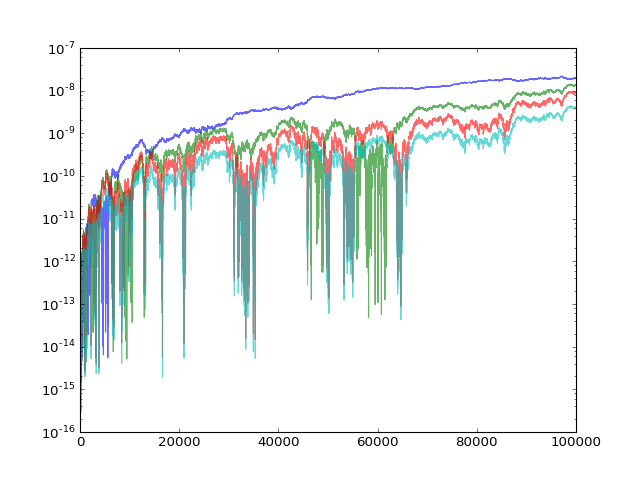

In [6]:
test_sim = gb.BinarySim(mass_ratio=0.8, eccentricity=0.4)
test_sim.run(steps_period)

delta_x1  = absolute_difference(test_sim.paths["binary"]["pos"][0, 0, 0],
                                test_sim.paths["binary"]["pos"][0, 0, :])
delta_y1  = absolute_difference(test_sim.paths["binary"]["pos"][0, 1, 0],
                                test_sim.paths["binary"]["pos"][0, 1, :])
delta_vx1 = absolute_difference(test_sim.paths["binary"]["vel"][0, 0, 0],
                                test_sim.paths["binary"]["vel"][0, 0, :])
delta_vy1 = absolute_difference(test_sim.paths["binary"]["vel"][0, 1, 0],
                                test_sim.paths["binary"]["vel"][0, 1, :])
fig, ax = plt.subplots()
ax.plot(delta_x1, label='x1', alpha=0.6)
ax.plot(delta_y1, label='y1', alpha=0.6)
ax.plot(delta_vx1, label='vx1', alpha=0.6)
ax.plot(delta_vy1, label='vy1', alpha=0.6)
ax.set_yscale("log")

## binary + n particles

In [10]:
pos = np.zeros((9, 3))
starting_x = [0, -0.3, -0.6, -0.9, -1.2, 0.15, 0.45, 0.75, 1.05]
pos[:, 0] = starting_x
vel = np.zeros(pos.shape)
    # line of stationary test particles

#### circular binary stays circular

In [9]:
test_sim = gb.BinarySim(mass_ratio=0.6)
test_sim.add_test_particles(pos, vel)
test_sim.run(steps_dense)
r1 = np.sqrt(test_sim.paths["binary"]["pos"][0, 0, :]**2 +
             test_sim.paths["binary"]["pos"][0, 1, :]**2)
r2 = np.sqrt(test_sim.paths["binary"]["pos"][1, 0, :]**2 +
             test_sim.paths["binary"]["pos"][1, 1, :]**2)
r1_error = absolute_difference(r1, 0.4)/0.4  # Kepler radii are 0.4, 0.6
r2_error = absolute_difference(r2, 0.6)/0.6
print "dense sample:", r1_error.max(), r2_error.max()

test_sim = gb.BinarySim(mass_ratio=0.6)
test_sim.add_test_particles(pos, vel)
test_sim.run(steps_long)
r1 = np.sqrt(test_sim.paths["binary"]["pos"][0, 0, :]**2 +
             test_sim.paths["binary"]["pos"][0, 1, :]**2)
r2 = np.sqrt(test_sim.paths["binary"]["pos"][1, 0, :]**2 +
             test_sim.paths["binary"]["pos"][1, 1, :]**2)
r1_error = absolute_difference(r1, 0.4)/0.4  # Kepler radii are 0.4, 0.6
r2_error = absolute_difference(r2, 0.6)/0.6
print " long sample:", r1_error.max(), r2_error.max()

dense sample: 1.80411241502e-15 1.2952601954e-15


KeyboardInterrupt: 

#### test particles are massless

In [ ]:
test_sim_single = gb.BinarySim(mass_ratio=0.6)
test_sim_single.add_test_particles([pos[-1]], [vel[-1]])
    # add only the last of the nine test particles used above
test_sim_single.run(steps_long)
withtestparticles_path = test_sim.paths["test"]["pos"][-1]
solo_path = test_sim_single.paths["test"]["pos"] 
print "solo vs test:", absolute_difference(withtestparticles_path,
                                           solo_path)

#### periodicity of elliptical binary

In [ ]:
test_sim = gb.BinarySim(mass_ratio=0.8, eccentricity=0.4)
test_sim.add_test_particles(pos, vel)
test_sim.run(steps_period)

delta_x1  = absolute_difference(test_sim.paths["binary"]["pos"][0, 0, 0],
                                test_sim.paths["binary"]["pos"][0, 0, :])
delta_y1  = absolute_difference(test_sim.paths["binary"]["pos"][0, 1, 0],
                                test_sim.paths["binary"]["pos"][0, 1, :])
delta_vx1 = absolute_difference(test_sim.paths["binary"]["vel"][0, 0, 0],
                                test_sim.paths["binary"]["vel"][0, 0, :])
delta_vy1 = absolute_difference(test_sim.paths["binary"]["vel"][0, 1, 0],
                                test_sim.paths["binary"]["vel"][0, 1, :])
fig, ax = plt.subplots()
ax.plot(delta_x1, label='x1', alpha=0.6)
ax.plot(delta_y1, label='y1', alpha=0.6)
ax.plot(delta_vx1, label='vx1', alpha=0.6)
ax.plot(delta_vy1, label='vy1', alpha=0.6)
ax.set_yscale("log")

### To Add:
 - integration with large n 
 - calculation of Jacobi constants with time
 - time-reversal check 